# Aion Game Bot Detection

## 0. 분석 전 환경설정

info_df => Player information features  
group_df => Group activities features  
action_df => Player actions features

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Aion Game Bot Detection'

/content/drive/MyDrive/Aion Game Bot Detection


In [ ]:
!pip install shap

In [3]:
import numpy as np
import pandas as pd

#### 데이터프레임 선언하기

In [4]:
info_df = pd.read_csv('/content/drive/MyDrive/Aion Game Bot Detection/dataset/Player information features.csv', encoding='utf-8-sig', index_col=False)
info_df

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,Human
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,Human
2,1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,Human
3,1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,Human
4,1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,Human
...,...,...,...,...,...,...,...,...,...,...,...
49734,472860,11369375,1,1,12485,12485.0000,804.5126,1,1,11,Human
49735,472867,8186481,1,1,14698,14698.0000,369.5057,2,1,10,Human
49736,472887,6764910,1,1,15200,15200.0000,619.1027,4,1,11,Human
49737,472897,7083623,1,1,12157,12157.0000,41728.9706,4,1,10,Human


In [5]:
group_df = pd.read_csv('/content/drive/MyDrive/Aion Game Bot Detection/dataset/Group activities features.csv', encoding='utf-8-sig', index_col=False)
group_df

,Actor,A_Acc,Avg_PartyTime,GuildAct_count,GuildJoin_count,Type
0,1047,6482393,6760.2061,1,0,Human
1,1049,6275719,4792.6923,2,0,Human
2,1120,6596993,5341.3333,0,0,Human
3,1164,6670686,4584.7143,0,0,Human
4,1184,4220231,6350.5000,0,0,Human
...,...,...,...,...,...,...
49734,472860,11369375,0.0000,0,0,Human
49735,472867,8186481,12803.0000,0,0,Human
49736,472887,6764910,0.0000,0,0,Human
49737,472897,7083623,0.0000,0,0,Human


In [6]:
action_df = pd.read_csv('/content/drive/MyDrive/Aion Game Bot Detection/dataset/Player actions features.csv', encoding='utf-8-sig', index_col=False)
action_df

,Actor,A_Acc,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,...,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day,Type
0,1047,6482393,6,1.0430,1012,24.0952,15.5210,15060,358.5714,6.2847,...,0.0476,690,16.4286,172,4.0952,1051,25.0238,2,0.0476,Human
1,1049,6275719,0,3.5570,141,8.8125,13.6226,540,33.7500,6.9122,...,0.1250,30,1.8750,16,1.0000,118,7.3750,0,0.0000,Human
2,1120,6596993,3,4.9882,190,47.5000,15.6734,597,149.2500,13.5994,...,0.0000,0,0.0000,20,5.0000,37,9.2500,0,0.0000,Human
3,1164,6670686,0,0.8581,30,3.3333,17.8776,625,69.4444,6.8650,...,0.0000,26,2.8889,6,0.6667,61,6.7778,0,0.0000,Human
4,1184,4220231,4,4.2667,215,19.5455,18.0194,908,82.5455,8.0572,...,0.0000,6,0.5455,17,1.5455,54,4.9091,0,0.0000,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49734,472860,11369375,0,0.1745,2,2.0000,23.6475,271,271.0000,15.5323,...,0.0000,0,0.0000,3,3.0000,15,15.0000,0,0.0000,Human
49735,472867,8186481,10,0.3361,6,6.0000,21.5126,384,384.0000,15.0700,...,0.0000,0,0.0000,2,2.0000,16,16.0000,0,0.0000,Human
49736,472887,6764910,0,0.2565,10,10.0000,13.1606,513,513.0000,15.6747,...,0.0000,0,0.0000,4,4.0000,11,11.0000,0,0.0000,Human
49737,472897,7083623,19,0.0000,0,0.0000,16.1488,343,343.0000,17.8908,...,0.0000,0,0.0000,1,1.0000,10,10.0000,0,0.0000,Human


### 0. neptune.ai settings

In [ ]:
!pip install neptune-client

## 1. 기초 데이터 분석 & 탐색적 데이터 분석
- 분석 목표 정의하기
- 독립변수 분포 확인
- 종속변수 분포 확인
- 독립변수 간 상관분석

### 분석 목표 : Type Bot에서 작업장 패턴 찾아내기 (쾌적한 게임 환경을 위한)  
❗ 작업장 탐지 - 가동 날짜가 유사하며, 채집 및 경험치 획득, 아이템 획득 양 등이 비슷한 봇들이 있는지 찾아보자

In [ ]:
round(action_df['Type'].value_counts(normalize=True) * 100) # 전체 Type 별 비율 측정

Human    87.0
Bot      13.0
Name: Type, dtype: float64

In [ ]:
action_df.info() #데이터 형태 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Actor                       49739 non-null  int64  
 1   A_Acc                       49739 non-null  int64  
 2   collect_max_count           49739 non-null  int64  
 3   Sit_ratio                   49739 non-null  float64
 4   Sit_count                   49739 non-null  int64  
 5   sit_count_per_day           49739 non-null  float64
 6   Exp_get_ratio               49739 non-null  float64
 7   Exp_get_count               49739 non-null  int64  
 8   exp_get_count_per_day       49739 non-null  float64
 9   Item_get_ratio              49739 non-null  float64
 10  Item_get_count              49739 non-null  int64  
 11  item_get_count_per_day      49739 non-null  float64
 12  Money_get_ratio             49739 non-null  float64
 13  Money_get_count             497

#### 데이터 정규성 검정  
귀무가설 H0; 표본의 모집단이 정규분포를 이루고 있다.  
대립가설 H1; 표본의 모집단이 정규분포를 이루고 있지않다.

In [28]:
from scipy.stats import shapiro, normaltest #샤피로 검정

sample_df = action_df.sample(n=5000)
shapiro(sample_df["exp_get_count_per_day"].values)

(0.36415743827819824, 0.0)

귀무가설 기각, 데이터가 정규분포를 이루고 있지 않음  
상관분석 시행 시 비모수검정인 spearman 상관분석을 실행함 (정규분포시 pearson)  
참고자료 : https://m.blog.naver.com/yk60park/221902867166  

In [29]:
data = info_df.iloc[:, :-1]
data_corr = pd.DataFrame(data).corr(method='spearman')
data_corr.describe()

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.104333,0.056092,0.488712,0.487526,0.519415,0.310995,0.336692,0.498030,0.319214,0.416937
std,0.508196,0.412807,0.505515,0.507267,0.352723,0.327266,0.429746,0.489266,0.379611,0.467441
min,-0.550813,-0.248304,-0.453604,-0.457081,-0.146105,-0.015867,-0.417442,-0.414593,-0.275609,-0.550813
25%,-0.444564,-0.201718,0.231514,0.227615,0.356702,0.126058,0.115624,0.285887,0.059552,0.383339
50%,-0.345101,-0.171376,0.621677,0.621573,0.679942,0.190767,0.458579,0.615222,0.359529,0.584753
75%,0.101747,0.202699,0.883493,0.883879,0.711223,0.370915,0.590535,0.891480,0.536186,0.651039
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1584x1584 with 0 Axes>

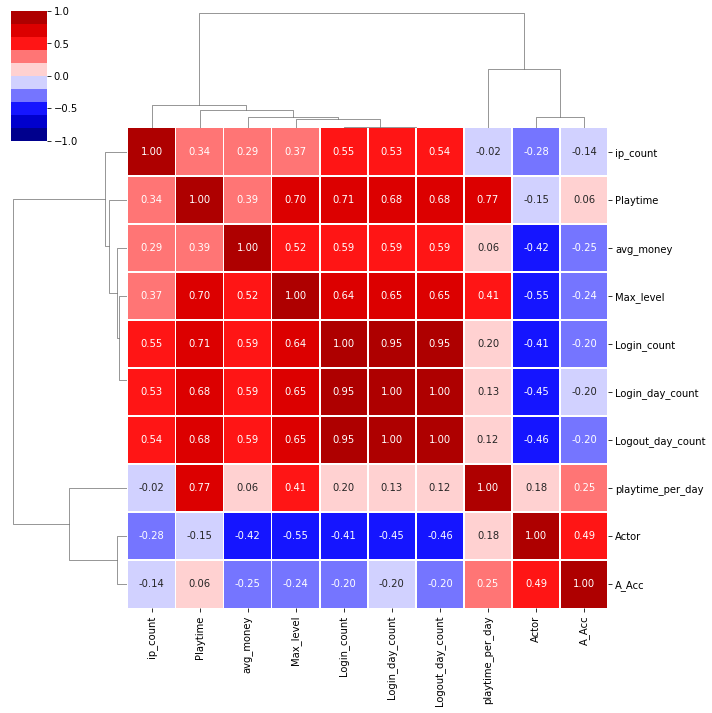

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [163]:
action_bot = action_df[action_df['Type'] == 'Bot']
action_human = action_df[action_df['Type'] == 'Human'] 

In [159]:
bot_var = action_bot['exp_get_count_per_day'].var()
hum_var = action_human['exp_get_count_per_day'].var()
print(bot_var, hum_var)

4933819.172267431 119740.99381201957


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(10000.0, 20000.0)

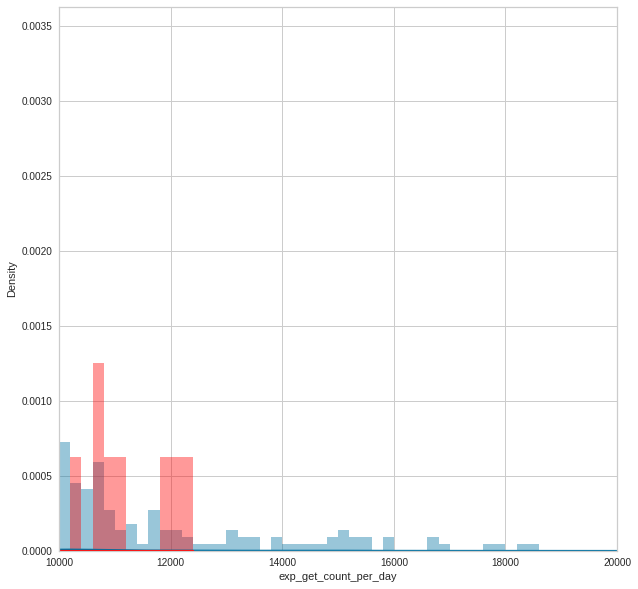

In [164]:
plt.figure(figsize=(10,10))
ax = sns.distplot(action_bot['exp_get_count_per_day'], kde=True, hist=True, hist_kws={"range": [10000, 20000]})
sns.distplot(action_human['exp_get_count_per_day'], kde=True, hist=True, hist_kws={"range": [10000, 20000]}, color="red")
ax.set_xlim(10000, 20000)

## 2. 가설 설정하기

1. 가설 : Type Bot 중에서도, 유사한 패턴을 보이면 같은 작업장 내 계정일 것이다. (현재 데이터셋으로는 가설 검증 불가, Actor당 ip값이 존재해야 검증가능)  
동일한 매크로 프로그램을 사용할 때, 어떤 항목이 유사할 지 고려한다  

|데이터프레임|컬럼명|비고|
|------|---|---|
|info_df|Login_day_count||
|info_df|Logout_day_count||
|info_df|playtime_per_day||
|info_df|ip_count||
|action_df|Exp_get_ratio||
|action_df|Exp_get_count||
|action_df|exp_get_count_per_day||
|action_df|Item_get_ratio||
|action_df|Item_get_count||
|action_df|item_get_count_per_day||
|action_df|Money_get_ratio||
|action_df|Money_get_count||
|action_df|money_get_count_per_day||


In [31]:
info_bot = info_df[info_df['Type'] == 'Bot']

In [39]:
merge_df = pd.merge(info_bot[["Actor","Login_day_count", "Logout_day_count", "playtime_per_day", "ip_count"]]
                    ,action_bot[["Actor","Exp_get_ratio", "Exp_get_count", "exp_get_count_per_day", "Item_get_ratio", "Item_get_count", "item_get_count_per_day", "Money_get_ratio", "Money_get_count", "money_get_count_per_day", "Type"]]
                    ,how='left'
                    ,on='Actor')
merge_df

,Actor,Login_day_count,Logout_day_count,playtime_per_day,ip_count,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Type
0,1459,25,25,38848.7200,22,22.7625,18612,744.4800,29.0206,23729,949.1600,4.7881,3915,156.600000,Bot
1,2238,7,6,76123.8333,2,73.9829,15967,2661.1667,6.4128,1384,230.6667,0.0741,16,2.666667,Bot
2,3001,31,31,10182.1613,7,14.1516,5924,191.0968,5.3009,2219,71.5806,10.2291,4282,138.129032,Bot
3,3265,7,7,72316.8571,3,28.2354,27034,3862.0000,26.9288,25783,3683.2857,0.0512,49,7.000000,Bot
4,3826,12,12,4006.0000,9,5.9877,488,40.6667,17.0429,1389,115.7500,1.5828,129,10.750000,Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,472405,2,1,25288.0000,1,13.5990,4911,4911.0000,15.3574,5546,5546.0000,0.6452,233,233.000000,Bot
6246,472426,2,2,5804.0000,1,22.1461,97,48.5000,14.1553,62,31.0000,6.3927,28,14.000000,Bot
6247,472523,1,1,11173.0000,1,17.6929,227,227.0000,17.4591,224,224.0000,9.1193,117,117.000000,Bot
6248,472748,1,1,39219.0000,1,2.8829,643,643.0000,2.0534,458,458.0000,2.7843,621,621.000000,Bot


정규화 진행 후 k-means clustering으로 유사한 이들끼리 어떻게 묶이는지 보기  
참고자료 : https://jimmy-ai.tistory.com/52  

In [45]:
from sklearn.preprocessing import MinMaxScaler

export_feature = merge_df[["Login_day_count", "Logout_day_count", "playtime_per_day", "ip_count", "Exp_get_ratio", "Exp_get_count", "exp_get_count_per_day", "Item_get_ratio", "Item_get_count", "item_get_count_per_day", "Money_get_ratio", "Money_get_count", "money_get_count_per_day"]]
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(export_feature)

In [83]:
from sklearn.cluster import KMeans

k = 6
model = KMeans(n_clusters = k, random_state = 24)
model.fit(data_scale)
merge_df['cluster'] = model.fit_predict(data_scale)

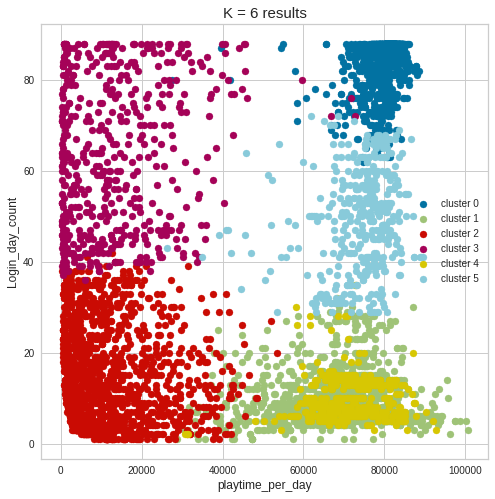

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

row = 'playtime_per_day'
col = 'Login_day_count' 

for i in range(k):
    plt.scatter(merge_df.loc[merge_df['cluster'] == i, row], merge_df.loc[merge_df['cluster'] == i, col], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel(row, size = 12)
plt.ylabel(col, size = 12)
plt.winter()
plt.show()

playtime_per_day와 Login_day_count를 기준으로 6-means clustering을 진행하면,  다른 cluster들과 다르게 cluster0과 cluster4가 응집된 형태로 클러스터링 되었음을 볼 수 있다. (= 작업장 봇을 유추할 수 있다)  
다만 헤비유저일 경우를 고려하여 cluster4를 우선적으로 탐색한다.

In [108]:
target_4 = merge_df[merge_df['cluster'] == 4] #playtime_per_day와 Login_day_count
target_4

,Actor,Login_day_count,Logout_day_count,playtime_per_day,ip_count,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Type,cluster
76,35091,6,7,82016.1429,4,26.6608,22964,3280.5714,15.7499,13566,1938.0000,25.6635,22105,3157.857143,Bot,4
80,36992,9,10,65030.2000,3,27.0847,20229,2022.9000,11.1906,8358,835.8000,23.5339,17577,1757.700000,Bot,4
202,98621,20,17,86975.8235,1,29.9015,41730,2454.7059,17.9789,25091,1475.9412,19.2744,26899,1582.294118,Bot,4
245,118445,12,12,74950.4167,4,29.2223,28992,2416.0000,10.5532,10470,872.5000,22.1929,22018,1834.833333,Bot,4
286,141954,11,11,86917.1818,4,43.1936,34529,3139.0000,17.6307,14094,1281.2727,15.9707,12767,1160.636364,Bot,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,470244,7,7,60366.2857,2,28.5262,15595,2227.8571,20.2491,11070,1581.4286,17.4779,9555,1365.000000,Bot,4
6160,470252,7,7,67179.4286,1,39.6717,60017,8573.8571,25.8388,39090,5584.2857,27.5224,41637,5948.142857,Bot,4
6221,471220,5,4,69950.0000,4,41.1954,58860,14715.0000,21.3900,30562,7640.5000,32.6176,46604,11651.000000,Bot,4
6222,471231,5,4,68923.7500,4,50.0806,55598,13899.5000,28.2281,31338,7834.5000,15.2643,16946,4236.500000,Bot,4


login_day_count가 동일한 애들 기준으로, exp_get_count_per_day를 비교해본다.

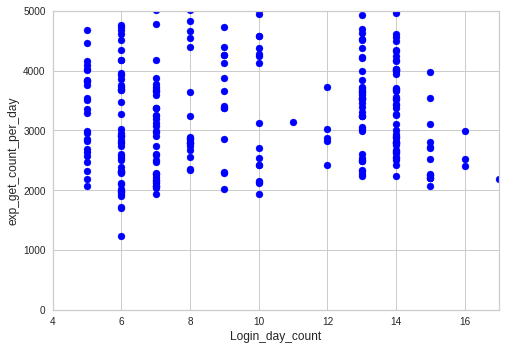

In [150]:
plt.scatter(target_4['Login_day_count'], target_4['exp_get_count_per_day'], color='blue')
plt.ylim([0, 5000])
plt.xlim([4,17])
plt.xlabel('Login_day_count', size = 12)
plt.ylabel('exp_get_count_per_day', size = 12)
plt.show()

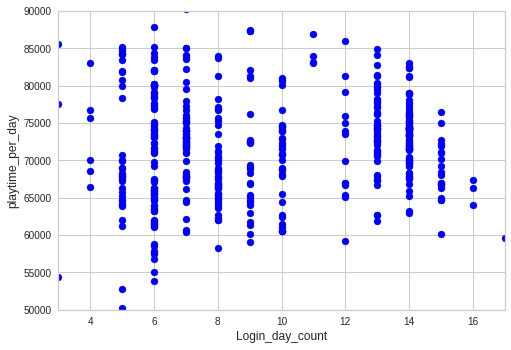

In [152]:
plt.scatter(target_4['Login_day_count'], target_4['playtime_per_day'], color='blue')
plt.ylim([50000,90000])
plt.xlim([3,17])
plt.xlabel('Login_day_count', size = 12)
plt.ylabel('playtime_per_day', size = 12)
plt.show()

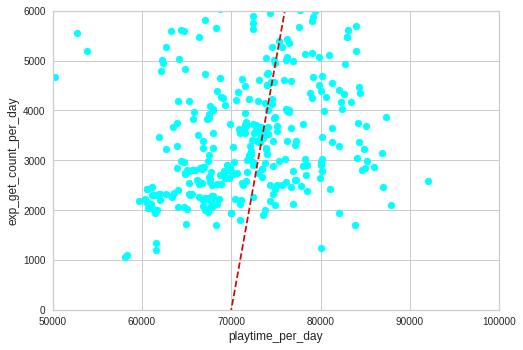

In [199]:
plt.scatter(target_4['playtime_per_day'], target_4['exp_get_count_per_day'], color='cyan')
import numpy as np
x = np.linspace(0,100000,50)
y = x - 70000 # y = x + c (playtime_per_day와 exp_get_count_per_day가 선형적으로 증가할 경우)
plt.plot(x, y, '--r')
plt.xlim([50000, 100000])
plt.ylim([0, 6000])
plt.xlabel('playtime_per_day', size = 12)
plt.ylabel('exp_get_count_per_day', size = 12)
plt.show()

작업장으로 의심되는 유저들은, 게임 플레이 시간과 경험치 획득량이 선형적으로 증가함을 볼 수 있다.  
여기서 그러면, 일반 유저들은 playtime_per_day와 exp_get_count_per_day가 선형적으로 증가할까?

In [201]:
info_human = info_df[info_df['Type'] == 'Human']
merge_human = pd.merge(info_human[["Actor","Login_day_count", "Logout_day_count", "playtime_per_day", "ip_count"]]
                    ,action_human[["Actor","Exp_get_ratio", "Exp_get_count", "exp_get_count_per_day", "Item_get_ratio", "Item_get_count", "item_get_count_per_day", "Money_get_ratio", "Money_get_count", "money_get_count_per_day", "Type"]]
                    ,how='left'
                    ,on='Actor')
merge_human

,Actor,Login_day_count,Logout_day_count,playtime_per_day,ip_count,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,Item_get_count,item_get_count_per_day,Money_get_ratio,Money_get_count,money_get_count_per_day,Type
0,1047,46,42,18202.8571,27,15.5210,15060,358.5714,6.2847,6098,145.1905,10.2010,9898,235.666667,Human
1,1049,16,16,3018.7500,13,13.6226,540,33.7500,6.9122,274,17.1250,7.5429,299,18.687500,Human
2,1120,4,4,9466.7500,6,15.6734,597,149.2500,13.5994,518,129.5000,9.7926,373,93.250000,Human
3,1164,9,9,3843.5556,6,17.8776,625,69.4444,6.8650,240,26.6667,13.5584,474,52.666667,Human
4,1184,11,11,10698.7273,8,18.0194,908,82.5455,8.0572,406,36.9091,9.2876,468,42.545455,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43484,472860,1,1,12485.0000,1,23.6475,271,271.0000,15.5323,178,178.0000,17.9756,206,206.000000,Human
43485,472867,1,1,14698.0000,1,21.5126,384,384.0000,15.0700,269,269.0000,10.0280,179,179.000000,Human
43486,472887,1,1,15200.0000,1,13.1606,513,513.0000,15.6747,611,611.0000,2.7450,107,107.000000,Human
43487,472897,1,1,12157.0000,1,16.1488,343,343.0000,17.8908,380,380.0000,6.4030,136,136.000000,Human


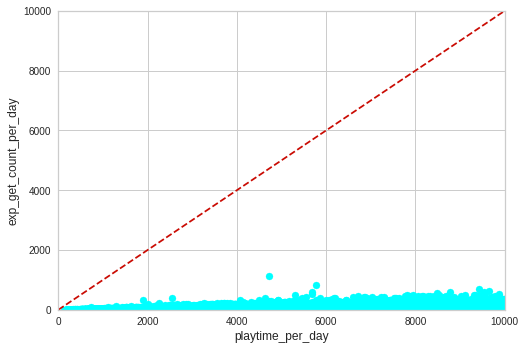

In [212]:
plt.scatter(merge_human['playtime_per_day'], merge_human['exp_get_count_per_day'], color='cyan')
import numpy as np
x = np.linspace(0,100000,50)
y = x
plt.plot(x, y, '--r')
plt.xlim([0, 10000])
plt.ylim([0, 10000])
plt.xlabel('playtime_per_day', size = 12)
plt.ylabel('exp_get_count_per_day', size = 12)
plt.show()

y=x+c에 해당하는 패턴은 보이지 않는다.  
따라서, 시각화를 통해 작업장이 있었으리라 판단할 수 있다

##3. human-bot 구분 모델 구축하기
3-fold 교차검증 참고자료 : http://www.gisdeveloper.co.kr/?p=9932  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import shap

X_train, X_test, y_train, y_test = train_test_split(info_df.iloc[:, :-1], info_df.Type, test_size=0.1, stratify=info_df.Type, random_state=32)
y_train_Bot = (y_train == "Bot")
y_test_Bot = (y_test == "Bot")
params = { 'n_estimators' : [10, 50, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [ ]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9532


In [ ]:
from sklearn.metrics import accuracy_score

rf_clf_opt = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf_opt.fit(X_train, y_train)
pred = rf_clf_opt.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9554


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(rf_clf_opt, X_train, y_train_Bot, cv=3)
cf = confusion_matrix(y_train_Bot, y_train_pred)
print(cf)

[[38784   356]
 [ 1741  3884]]


#### 랜덤 포레스트 시각화 

https://teddylee777.github.io/visualization/Decision-Tree%EA%B0%80-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%B6%84%ED%95%A0%ED%96%88%EB%8A%94%EC%A7%80-%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0(graphviz)

In [ ]:
from sklearn.tree import export_graphviz
estimator = rf_clf_opt.estimators_[3]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = action_df.columns[:-1],
                class_names = action_df.Type,
                max_depth = 4, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True # 박스의 모양을 둥글게
               )

In [ ]:
!dot -Tpng tree.dot > tree.png

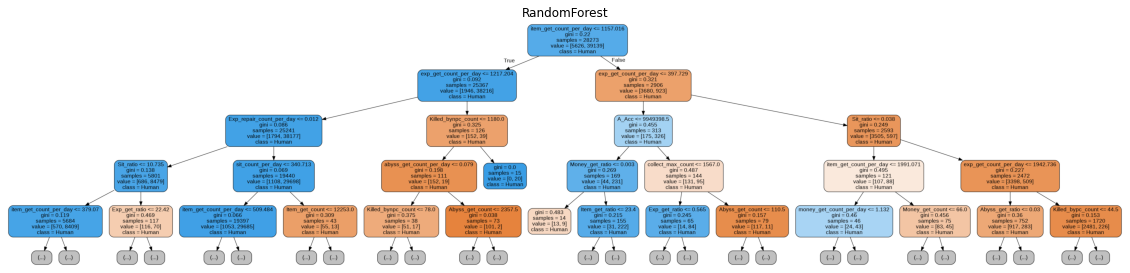

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

tree = mpimg.imread('tree.png')
plt.figure(figsize=(20, 5)) 
plt.title('RandomForest')
plt.axis('off')
plt.imshow(tree)

https://woolulu.tistory.com/28

#### 모델에서 중요하게 선택된 요소 탐색  

참고자료 : SHAP를 사용하여 Xai 모델 제작하기 (https://velog.io/@tobigs_xai/2%EC%A3%BC%EC%B0%A8-SHAP-SHapley-Additive-exPlanation)  
변수가 여러 개 일 경우 (https://hong-yp-ml-records.tistory.com/51)  

Feature importance
- playtime per day (일별 플레이 시간)  
- item get count per day (일별 아이템 획득량)
- exp get count per day (일별 경험치 획득량)  

Permutation imporance
- playtime per day (일별 플레이시간)
- avg_money (평균 재화)
-  exp_get_count_per_day (일별 경험치 획득량)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(rf_clf_opt)
shap_values = explainer.shap_values(X_train)

In [ ]:
X_test.loc[[0]]

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51


In [ ]:
choosen_instance = X_test.loc[[0]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)